In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [3]:
df.shape

(4177, 9)

Dataset have  columns and  rows

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Only Sex column is of object type rest of the columns are of numerical datatypes

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values

In [6]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

There are no constant columns, Sex has 3 unique values and Label has 26 values 

In [7]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Sex has 3 values, representing male,female and infant

In [8]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Label class is imbalanced

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Mean is greater than median for every column, that means distribution of data is not even and data is kewed towards right. Variance for every column is very low, almost close to zero. A no. of outliers are present as min, max and inter quartile range very much.

### Univariate Analysis

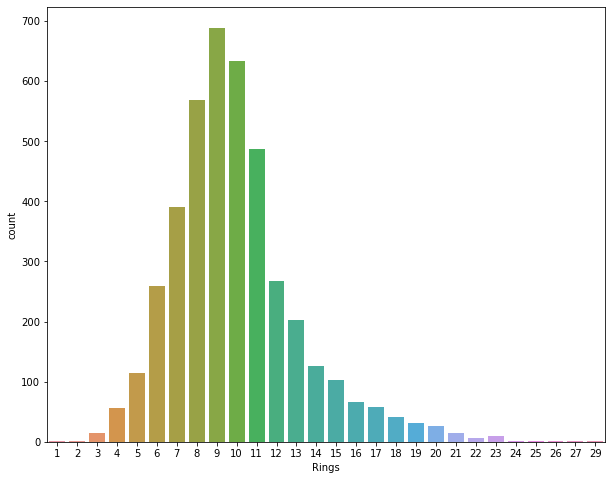

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df['Rings'])

Label class is not balanced, some data has counts greater than 600 while some have just one count in the entire data

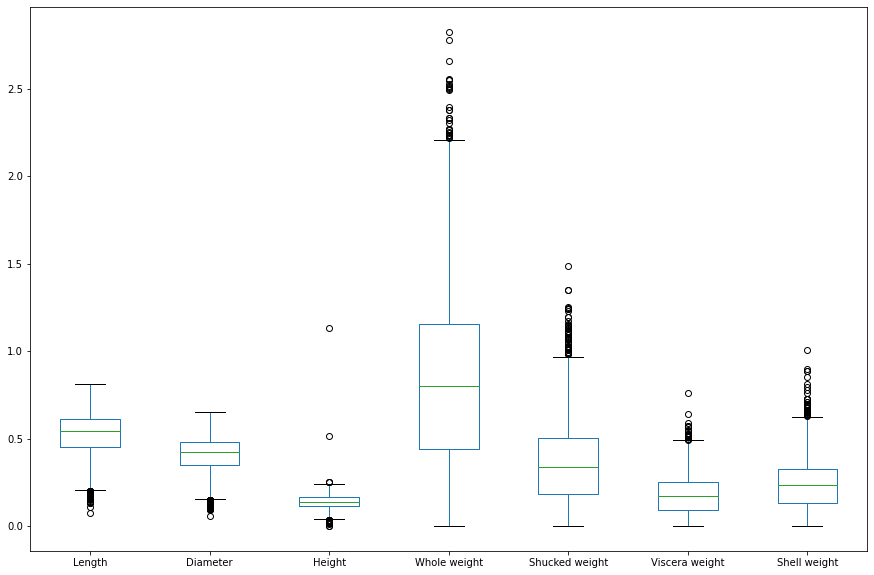

In [11]:
df.iloc[:,:-1].plot(kind='box',figsize=(15,10))

All the columns have some outliers present in them. Most no. of outliers seem to be present in the whole weight feature.

In [12]:
#Creating a list with names of numerical features
num=[]
for i in df.columns:
    if df[i].dtype!='O' and i!='Rings':
        num.append(i)

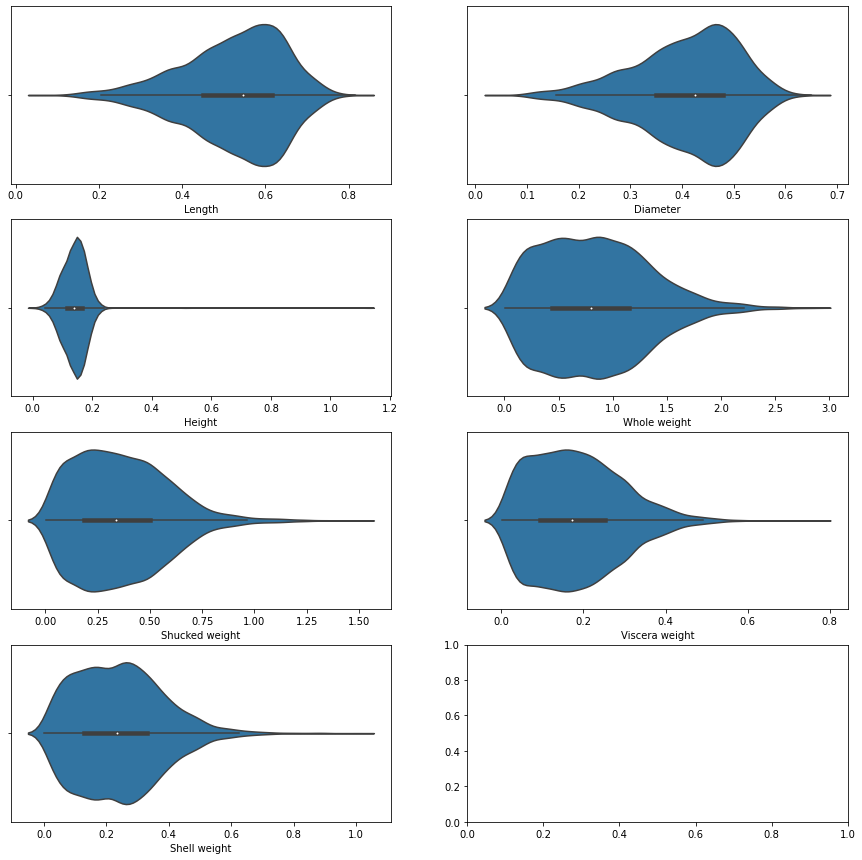

In [13]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
r=0
c=0
for i,n in enumerate(num):
        if i%2==0 and i>0:
            r+=1
            c=0
        sns.violinplot(df[n],ax=ax[r,c])
        c+=1

Density of data is even in whole weight,shuckled weight, shell weight, viscera weight with the presence of outliers, whereas height feature has density most density of values for 0.15

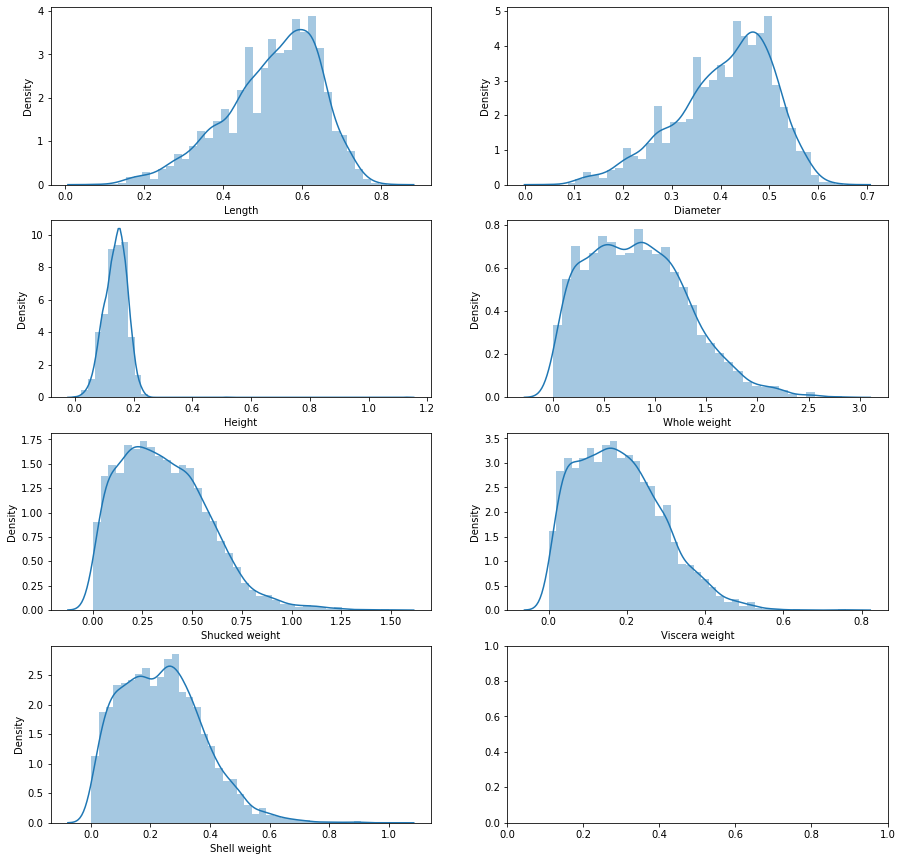

In [14]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
r=0
c=0
for i,n in enumerate(num):
        if i%2==0 and i>0:
            r+=1
            c=0
        sns.distplot(df[n],ax=ax[r,c])
        c+=1

Data is close to gaussian distibution but can improved after removing skewness and outliers

### Bivariate Analysis

Text(0.5, 0, 'Sex (0-Female 1-Infant 2-Male)')

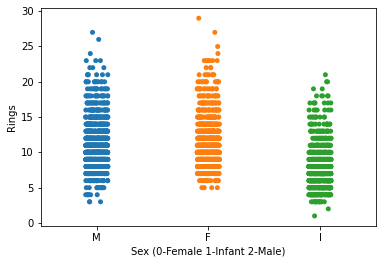

In [15]:
sns.stripplot(x='Sex',y='Rings',data=df)
plt.xlabel('Sex (0-Female 1-Infant 2-Male)')

Over here also female seem to live the longest. Infants have less no. of rings

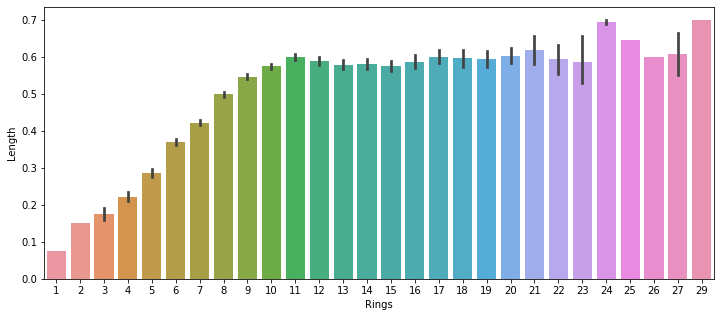

<Figure size 432x288 with 0 Axes>

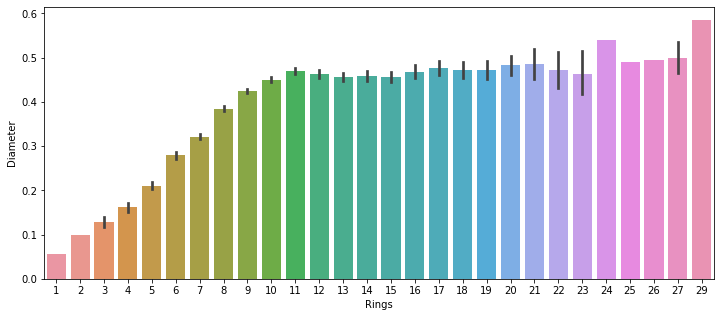

<Figure size 432x288 with 0 Axes>

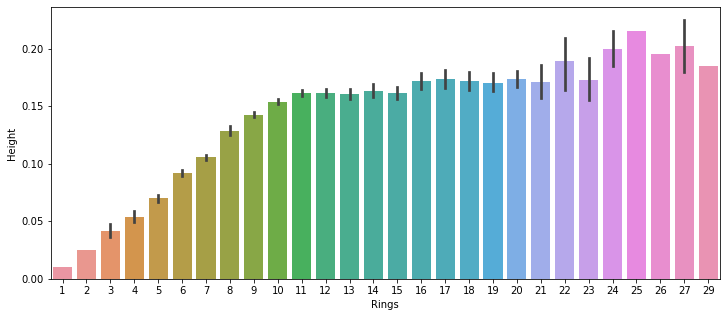

<Figure size 432x288 with 0 Axes>

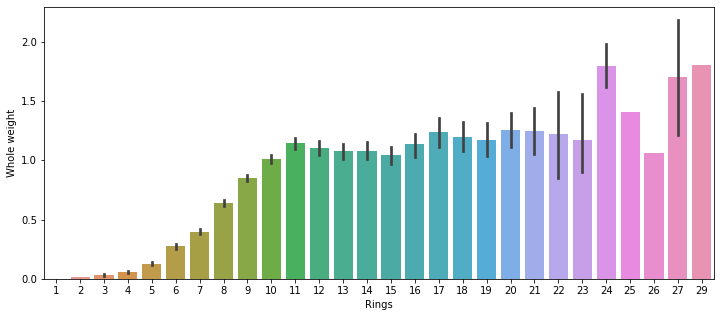

<Figure size 432x288 with 0 Axes>

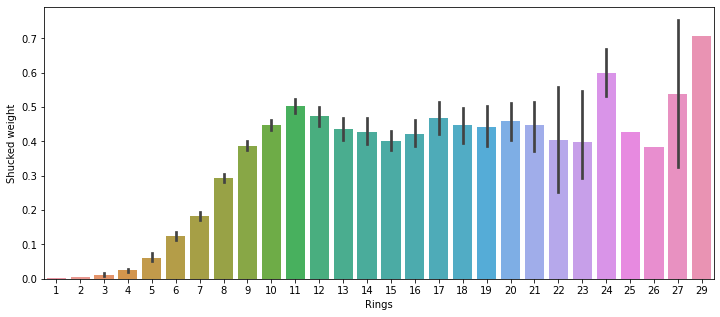

<Figure size 432x288 with 0 Axes>

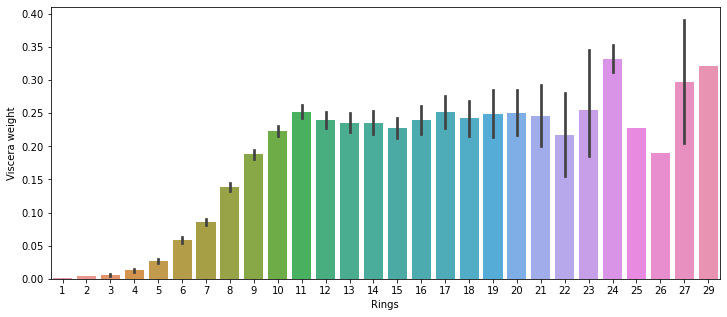

<Figure size 432x288 with 0 Axes>

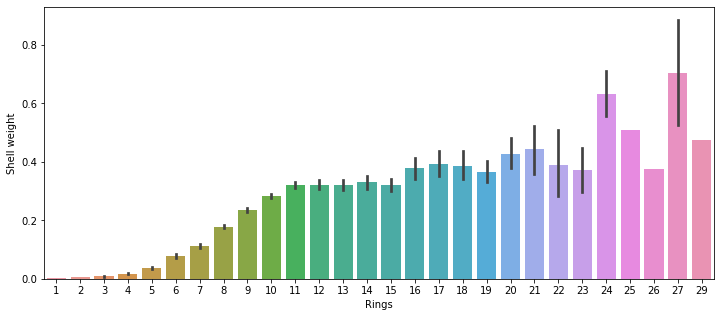

<Figure size 432x288 with 0 Axes>

In [16]:
for i in num:
    plt.figure(figsize=(12,5))
    sns.barplot(x='Rings',y=i,data=df)
    plt.figure()

With increase in values of the dependent features, no. of rings also increases till 11th value, after that graph seems to be constant for a while,after that again there is some increases.

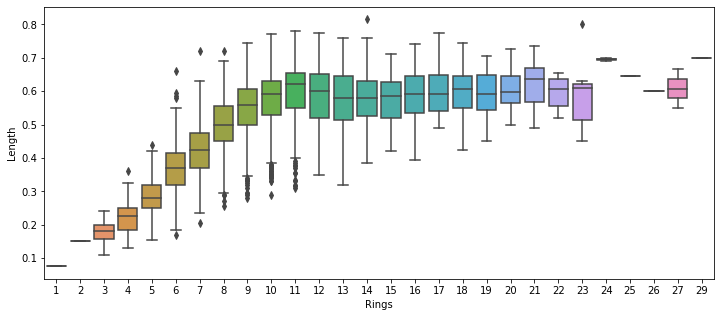

<Figure size 432x288 with 0 Axes>

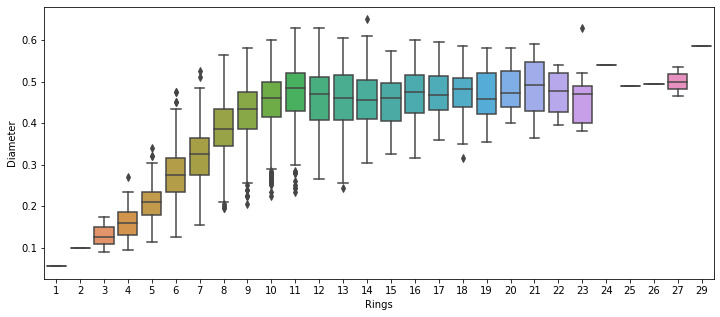

<Figure size 432x288 with 0 Axes>

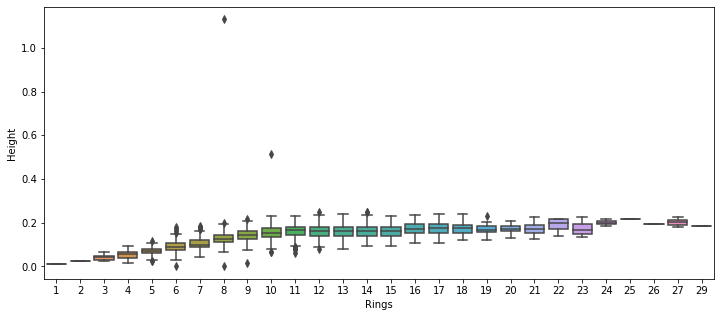

<Figure size 432x288 with 0 Axes>

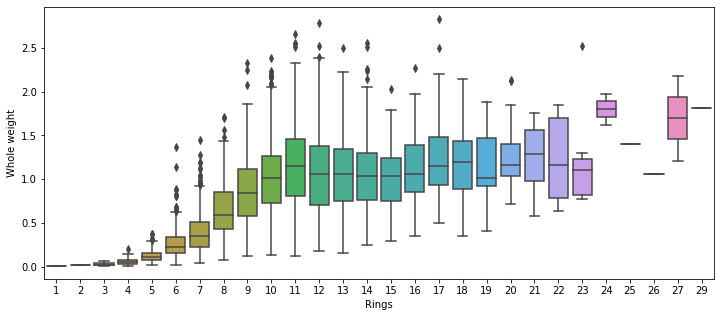

<Figure size 432x288 with 0 Axes>

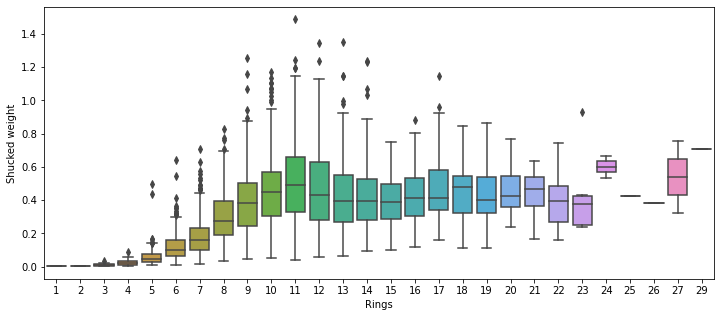

<Figure size 432x288 with 0 Axes>

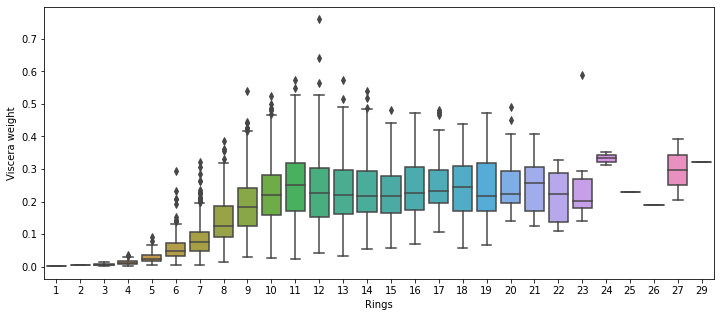

<Figure size 432x288 with 0 Axes>

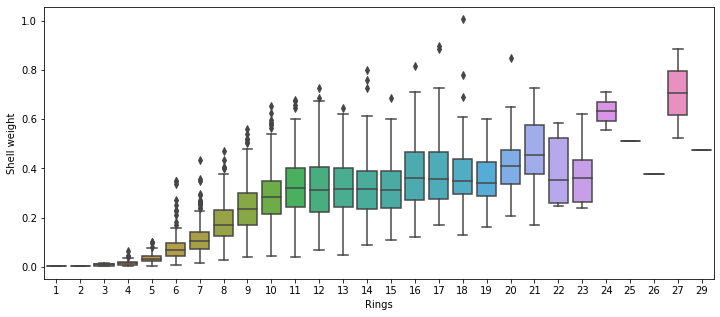

<Figure size 432x288 with 0 Axes>

In [17]:
for i in num:
    plt.figure(figsize=(12,5))
    sns.boxplot(x='Rings',y=i,data=df)
    plt.figure()

Rings increases with the increases in median values of dependet features. Most of the outliers lie in absalon having rings from 4 to 18

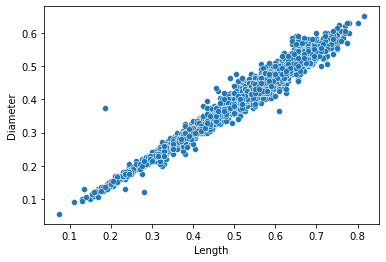

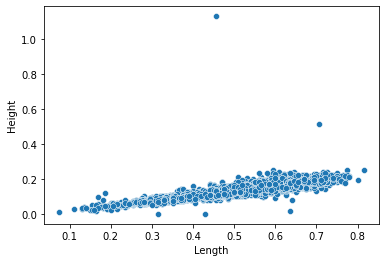

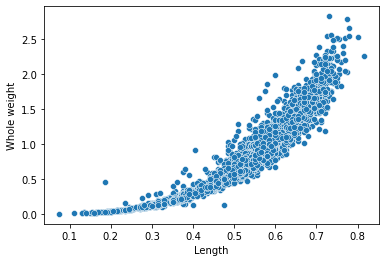

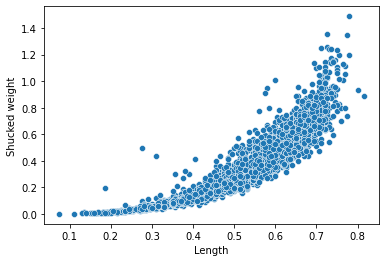

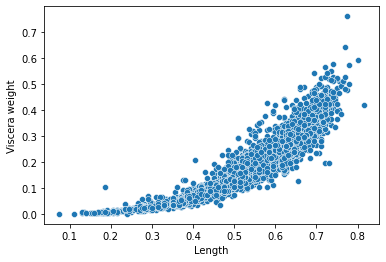

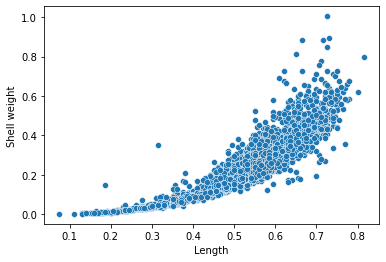

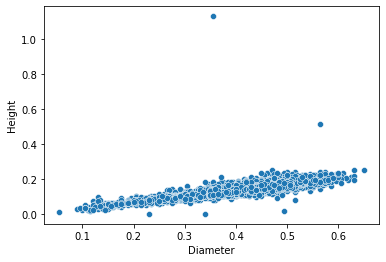

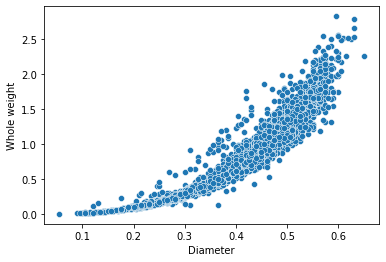

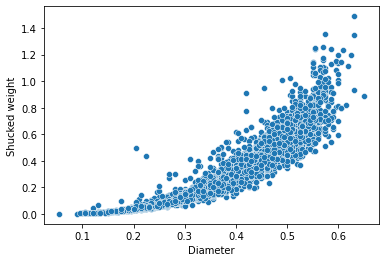

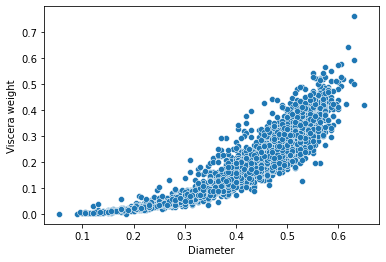

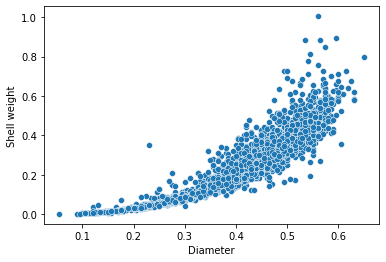

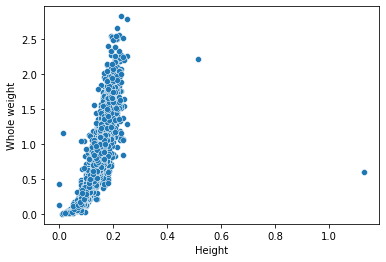

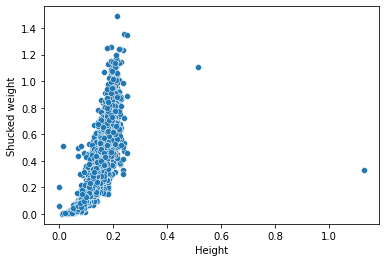

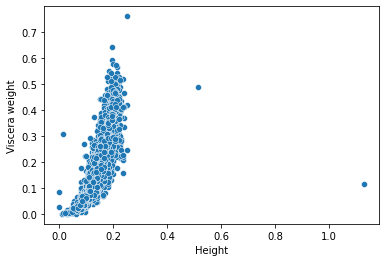

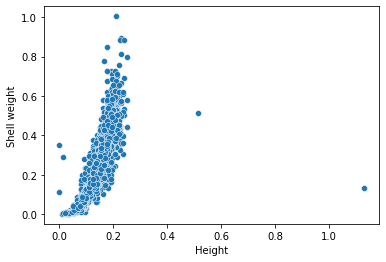

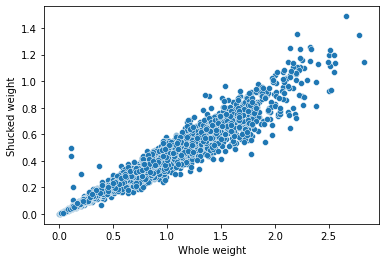

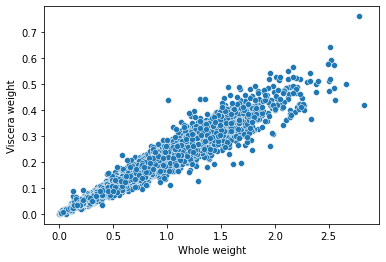

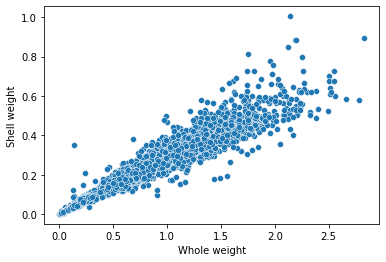

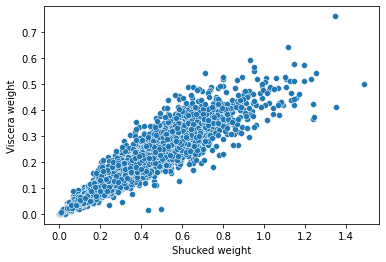

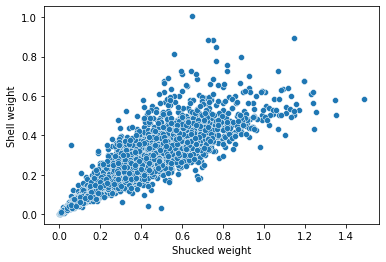

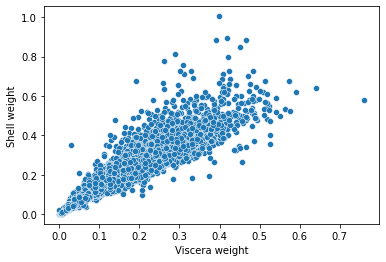

<Figure size 432x288 with 0 Axes>

In [18]:
for i in range(len(num)):
    for j in range(i+1,len(num)):
        sns.scatterplot(x=df[num[i]],y=df[num[j]])
        plt.figure()

There is collinearity within the dependent features,as one feature increases other also increases. With slight increase in the value of height other features like weights and diameter increases drastically

### Multivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000131F4DAB160>,
      dtype=object)

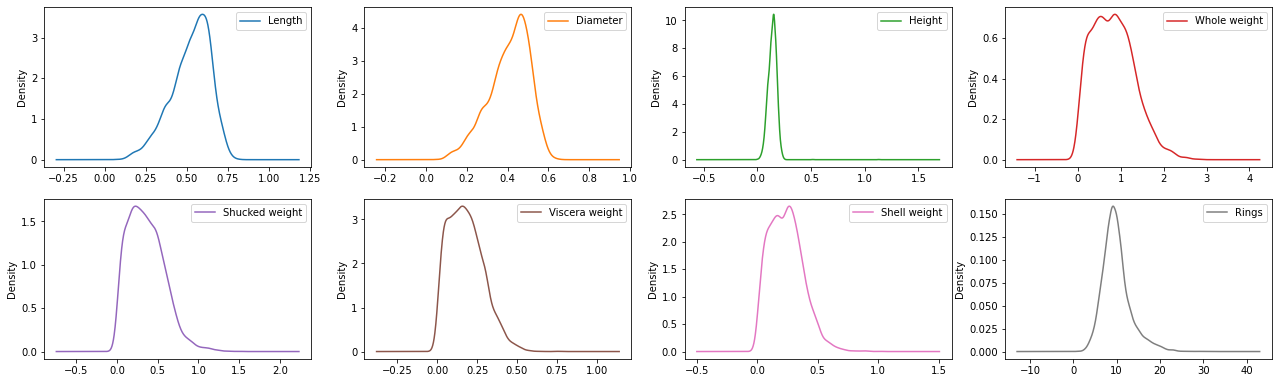

In [19]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,figsize=(22,10))

Lenghth, diameter, whole weight, shucked weight,shell weight have more clustered values. Lengh and Diameter Shucked weight has high density of values near 0.5 whereas height has more density of values near 0.2 along with viscera weight.

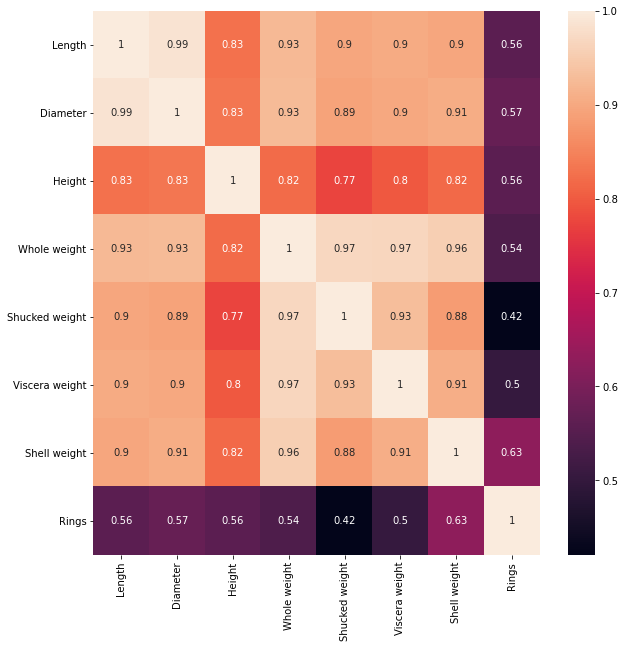

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Rings feature are highly correlated with shell weight,whole weight, height, length whereas There is high positive correlation between dependent features.

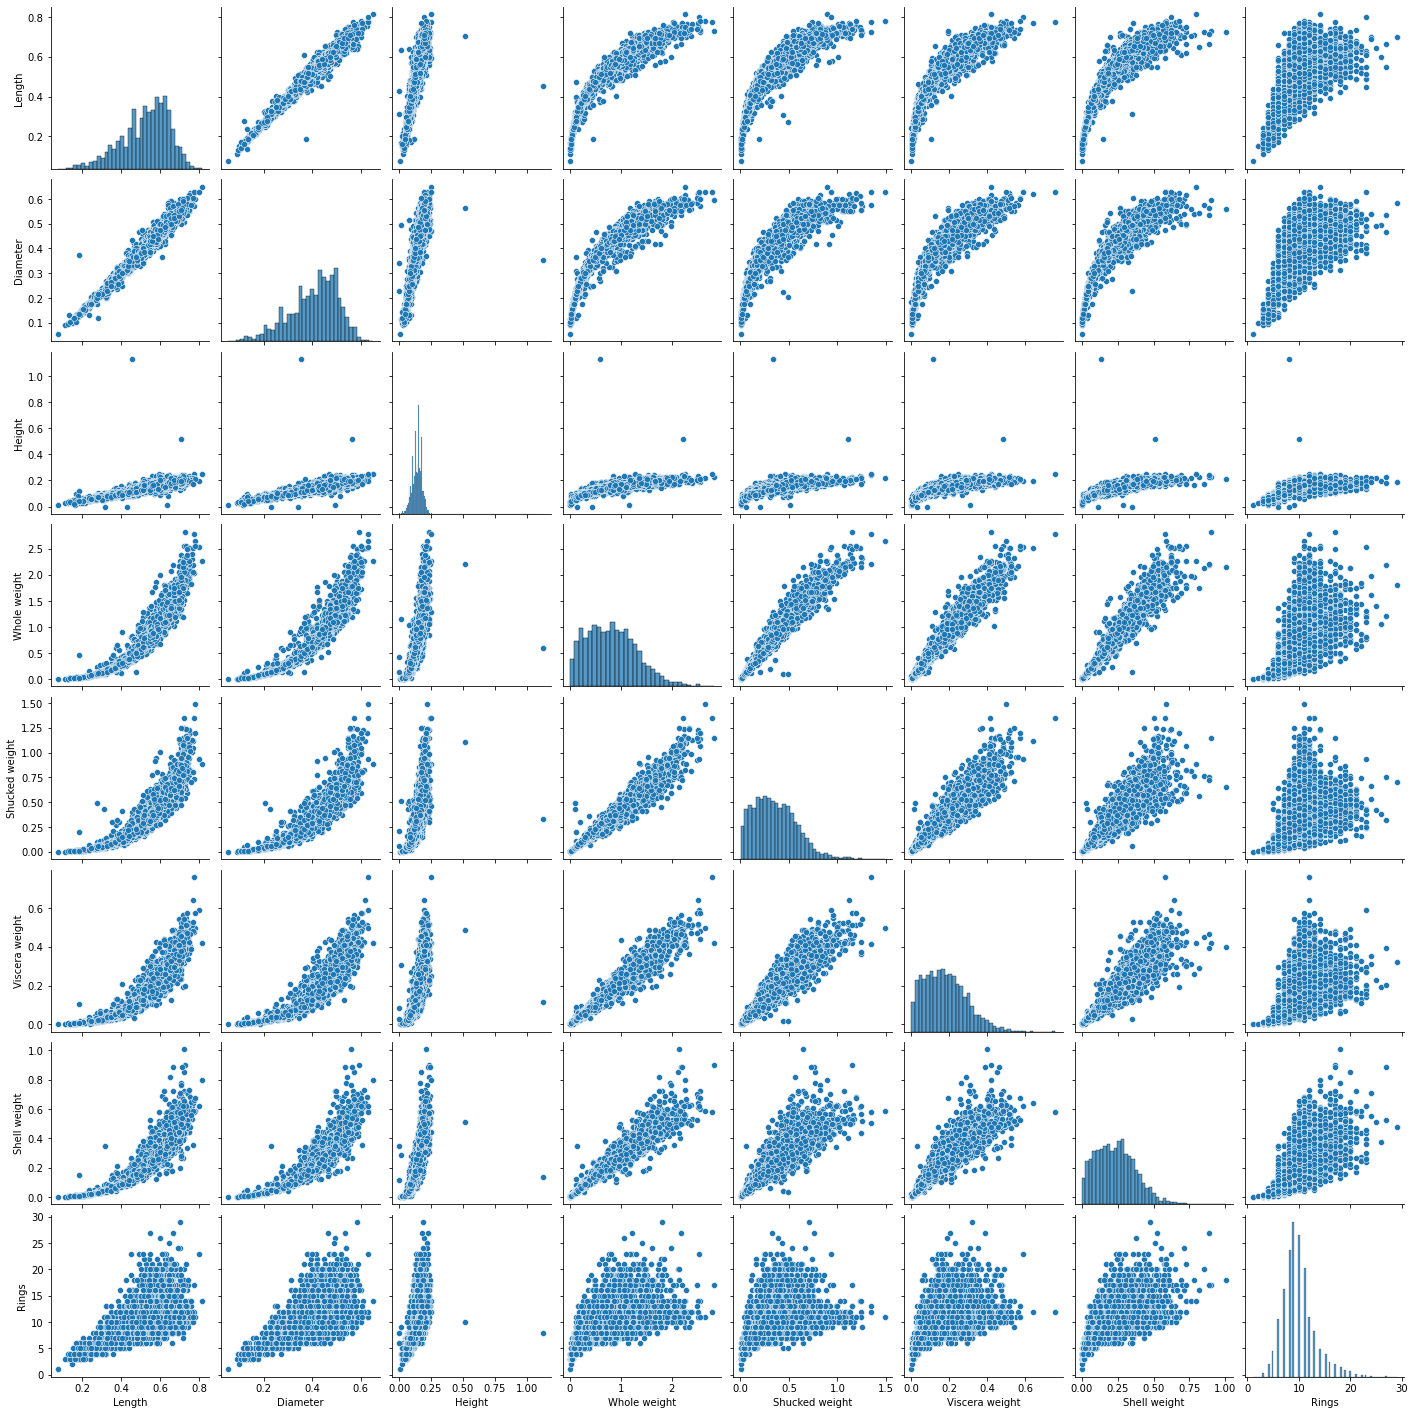

In [21]:
sns.pairplot(df)

Almost all the features show a linear relation with each other.

# Feature Engineering

In [22]:
#Encoding the Sex column
from sklearn.preprocessing import LabelEncoder
on=LabelEncoder()

In [23]:
df['Sex']=on.fit_transform(df['Sex'])

In [24]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
#separating dependent and independent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape,y.shape)

(4177, 8) (4177,)


In [26]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [27]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [28]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [29]:
#Removing skewness of columns through Power Transformer method
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in x.columns:
    if np.abs(x[i].skew())>0.5:
        x[i]=pt.fit_transform(x[i].values.reshape(-1,1))

In [30]:
x.skew()

Sex              -0.098155
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

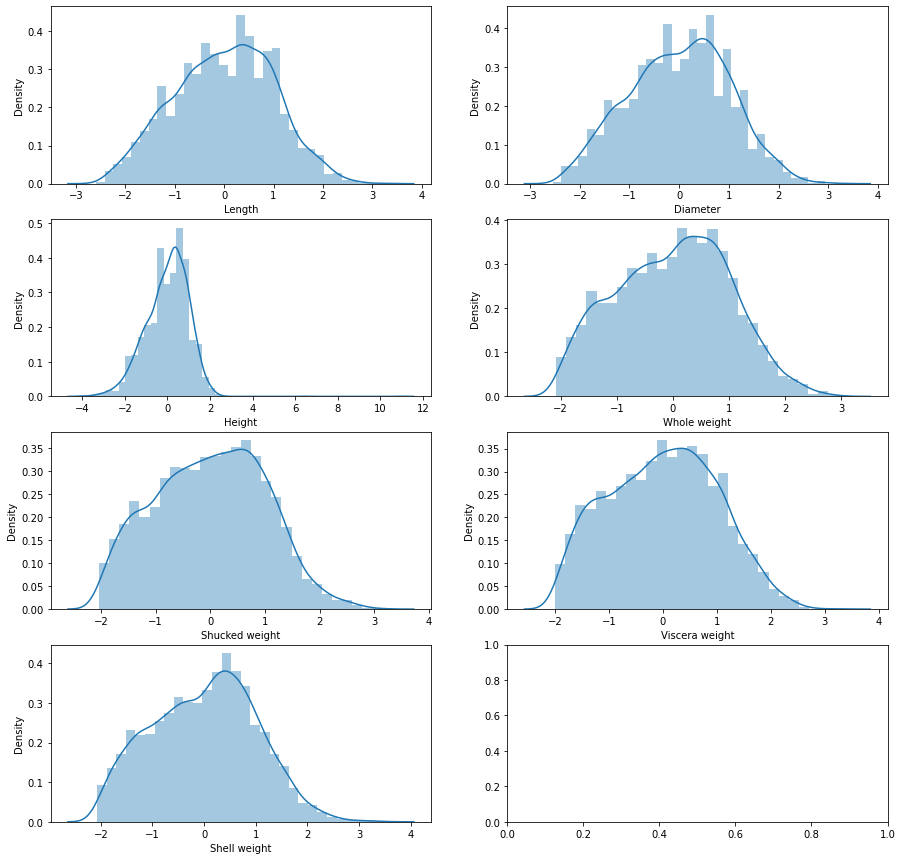

In [31]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
r=0
c=0
for i,n in enumerate(num):
        if i%2==0 and i>0:
            r+=1
            c=0
        sns.distplot(x[n],ax=ax[r,c])
        c+=1

Distribution of data has got better after removing skewness

In [32]:
#Handling the Imbalanced Dataset
from imblearn.over_sampling import RandomOverSampler
ov=RandomOverSampler()
x,y=ov.fit_resample(x,y)

In [33]:
print(x.shape,y.shape)

(19292, 8) (19292,)


In [34]:
y.value_counts()

15    689
14    689
1     689
17    689
2     689
18    689
3     689
19    689
4     689
20    689
5     689
21    689
6     689
22    689
7     689
23    689
8     689
24    689
9     689
25    689
10    689
26    689
11    689
27    689
12    689
13    689
29    689
16    689
Name: Rings, dtype: int64

All the counts of the label column have become equal

In [35]:
#Scaling the features using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [36]:
xd=mm.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.325838,0.342870,0.197642,0.298907,0.288691,0.247781,0.266809
1,1.0,0.204773,0.199152,0.188388,0.144815,0.140316,0.126626,0.132927
2,0.0,0.430533,0.438696,0.267742,0.374197,0.322359,0.330768,0.354830
3,1.0,0.306799,0.342870,0.250847,0.299876,0.278934,0.275339,0.274518
4,0.5,0.184770,0.186740,0.169533,0.132610,0.127120,0.104123,0.105398


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [39]:
#method to find best random state given dependent and independent features using Decision Tree Classifier
def randomstate(xdata,ydata):
        maxx=0
        for j in range(1,201):
            xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.25,random_state=j)
            m=DecisionTreeClassifier()
            m.fit(xtrain,ytrain)
            p=m.predict(xtest)
            acc=accuracy_score(p,ytest)
            if maxx<acc:
                maxx=acc
                k=j
        return k

In [40]:
#Method to analyse the performance of a model
def performance(prediction,ydata,s):
    accuracy=accuracy_score(prediction,ydata)
    confusion=confusion_matrix(prediction,ydata)
    report=classification_report(prediction,ydata)
    print('Accuracy',accuracy)
    print('Mean of Cross validation Score',s.mean())

In [41]:
#Importing Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [42]:
#creating a list of all the models
models=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
       GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [43]:
#Method creates models from the models list given dependent and independet features,while also calling function randomstate()
# and performace() function within it
def createmodels(xdata,ydata):
    xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.25,random_state=randomstate(xdata,ydata))
    for i in models:
        m=i
        m.fit(xtrain,ytrain)
        p=m.predict(xtest)
        score=cross_val_score(m,x,y,cv=5)
        print(m)
        performance(p,ytest,score)
        print('---------------------------------------------------')

#### Training and testing models on Oringinal data

In [44]:
createmodels(x,y)

KNeighborsClassifier()
Accuracy 0.8084179970972424
Mean of Cross validation Score 0.8132400395431979
---------------------------------------------------
SVC()
Accuracy 0.49948165042504666
Mean of Cross validation Score 0.49295068209866966
---------------------------------------------------
DecisionTreeClassifier()
Accuracy 0.9008915612689198
Mean of Cross validation Score 0.9015164808327125
---------------------------------------------------
RandomForestClassifier()
Accuracy 0.9021356002488078
Mean of Cross validation Score 0.9067515751924601
---------------------------------------------------
AdaBoostClassifier()
Accuracy 0.15343147418619116
Mean of Cross validation Score 0.12808473818751745
---------------------------------------------------
GradientBoostingClassifier()
Accuracy 0.8258345428156749
Mean of Cross validation Score 0.8204453083156379
---------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              cols

Random Forest and Xtreme Gradient boost perform the best in comarison to rest of the models

## Feature Selaection

###### Through feature importances technique using Random Forest

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [46]:
r=RandomForestClassifier()
r.fit(xtrain,ytrain)
r.feature_importances_

array([0.02695816, 0.12193026, 0.13286122, 0.11430704, 0.1491164 ,
       0.15641627, 0.13866066, 0.15974999])

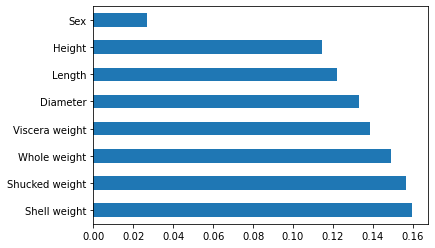

In [47]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(r.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Since Sex has the least importance we will drop this column

In [48]:
xfi=x.drop('Sex',axis=1)
xfi.shape

(19292, 7)

In [49]:
createmodels(xfi,y)

KNeighborsClassifier()
Accuracy 0.8131868131868132
Mean of Cross validation Score 0.8132400395431979
---------------------------------------------------
SVC()
Accuracy 0.4976155919552146
Mean of Cross validation Score 0.49295068209866966
---------------------------------------------------
DecisionTreeClassifier()
Accuracy 0.898610823139125
Mean of Cross validation Score 0.9016200271600887
---------------------------------------------------
RandomForestClassifier()
Accuracy 0.9042089985486212
Mean of Cross validation Score 0.9084102374378545
---------------------------------------------------
AdaBoostClassifier()
Accuracy 0.07982583454281568
Mean of Cross validation Score 0.12808473818751745
---------------------------------------------------
GradientBoostingClassifier()
Accuracy 0.8115280945469625
Mean of Cross validation Score 0.8199268512633848
---------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsam

Performs almost same as for original dataset and also, Random forest and Xtreme gradient boost perform best here.

###### Feature selection using chi2 test

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
select=SelectKBest(score_func=chi2,k='all')
fit=select.fit(x,y)

In [52]:
#we associate all the features with their scores for better understanding
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
scores=pd.concat([dfcolumns,dfscore],axis=1)
scores.columns=['features','Score']
scores

,features,Score
0,Sex,1126.110480
1,Length,1761.182761
2,Diameter,1876.204747
3,Height,678.932049
4,Whole weight,2286.875303
5,Shucked weight,1799.969713
6,Viscera weight,1880.356703
7,Shell weight,2469.466110


In [53]:
scores.nlargest(8,'Score')

,features,Score
7,Shell weight,2469.466110
4,Whole weight,2286.875303
6,Viscera weight,1880.356703
2,Diameter,1876.204747
5,Shucked weight,1799.969713
1,Length,1761.182761
0,Sex,1126.110480
3,Height,678.932049


Height has the least score so we drop this column

In [54]:
xchi=x.drop('Height',axis=1)
xchi.shape

(19292, 7)

In [55]:
createmodels(xchi,y)

KNeighborsClassifier()
Accuracy 0.8106987352270371
Mean of Cross validation Score 0.8132400395431979
---------------------------------------------------
SVC()
Accuracy 0.48724860045614765
Mean of Cross validation Score 0.49295068209866966
---------------------------------------------------
DecisionTreeClassifier()
Accuracy 0.9006842214389384
Mean of Cross validation Score 0.9024493112651231
---------------------------------------------------
RandomForestClassifier()
Accuracy 0.9052456976985279
Mean of Cross validation Score 0.9075287905942104
---------------------------------------------------
AdaBoostClassifier()
Accuracy 0.1341488699979266
Mean of Cross validation Score 0.12746265420617997
---------------------------------------------------
GradientBoostingClassifier()
Accuracy 0.8247978436657682
Mean of Cross validation Score 0.8188905013708336
---------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsa

From above we find that even after eliminating some features accuracy is almost same as for original data

###### We check if after dropping both these columns height and sex accuracy increases.

In [56]:
xmix=x.drop(['Height','Sex'],axis=1)
createmodels(xmix,y)

KNeighborsClassifier()
Accuracy 0.8040638606676342
Mean of Cross validation Score 0.8132400395431979
---------------------------------------------------
SVC()
Accuracy 0.48517520215633425
Mean of Cross validation Score 0.49295068209866966
---------------------------------------------------
DecisionTreeClassifier()
Accuracy 0.8984034833091437
Mean of Cross validation Score 0.9023976455703787
---------------------------------------------------
RandomForestClassifier()
Accuracy 0.9029649595687331
Mean of Cross validation Score 0.9076327667973624
---------------------------------------------------
AdaBoostClassifier()
Accuracy 0.09454696247149078
Mean of Cross validation Score 0.12808473818751745
---------------------------------------------------
GradientBoostingClassifier()
Accuracy 0.8233464648558988
Mean of Cross validation Score 0.8195124241487554
---------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              cols

### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

####  Random Forest

In [59]:
param_grid={'n_estimators':[400,500,700,900,None],
            'criterion':['gini','entropty'],
           'max_features':['int','float','auto','log2'],
           'max_depth':[None,1,2,3,4,5,6,7,8,9,10]}

In [60]:
g=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=5)

In [61]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropty'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'max_features': ['int', 'float', 'auto',
                                                         'log2'],
                                        'n_estimators': [400, 500, 700, 900,
                                                         None]})

In [62]:
print(g.best_params_)
print(g.best_score_)

{'n_estimators': 500, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini'}
0.604602989223326


In [63]:
rf=RandomForestClassifier(n_estimators= 500, max_features='log2', criterion='gini',max_depth=None)
rf.fit(xtrain,ytrain)
p=rf.predict(xtest)
score=cross_val_score(rf,x,y,cv=5)
print('Accuracy',accuracy_score(p,ytest))
print('-------------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('-------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('-------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))
print('-------------------------------------------------')
#print('ROC-AUC score',roc_auc_score(ytest,rf.predict_proba(xtest)[:,1],multi_class='ovo'))

Accuracy 0.9052456976985279
-------------------------------------------------
Mean of Cross validation Score 0.9072179098069576
-------------------------------------------------
Confusion Matrix
[[185   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 174   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0 182   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 193   3   2   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 152  18  11   3   2   2   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   6 126  20  11   6   3   0   2   0   0   0   0   0
    0   0   0   0   0   0   0

Rings having count 9 and 10 are the most wrongly classified.

#### XGBoost

In [64]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 6, 8, 10, 12, 15, None],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [65]:
g=RandomizedSearchCV(XGBClassifier(verbosity=0),params,cv=5)

In [66]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [67]:
print(g.best_params_)
print(g.best_score_)

{'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4}
0.8762180522487018


In [68]:
xg=XGBClassifier(min_child_weight=1,max_depth=15,learning_rate=0.1,gamma= 0.2,colsample_bytree= 0.4,verbosity=0)
xg.fit(xtrain,ytrain)
p=xg.predict(xtest)
score=cross_val_score(xg,x,y,cv=5)
print('Accuracy',accuracy_score(p,ytest))
print('-------------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('-------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('-------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))
print('-------------------------------------------------')
#print('ROC-AUC score',roc_auc_score(ytest,xg.predict_proba(xtest)[:,1],,multi_class='ovo'))

Accuracy 0.9054530375285093
-------------------------------------------------
Mean of Cross validation Score 0.9078917669519834
-------------------------------------------------
Confusion Matrix
[[185   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 174   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0 182   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 193   4   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 151  14  13   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   5 133  21   9   5   4   0   2   0   0   0   0   0
    0   0   0   0   0   0   0

Even here, 9th and 10th classes are the most wrongly classified.

##### Selecting the best model

Hence we choose XGBClassifier as our Final model.

### Finalizing the Model

In [69]:
xgb=XGBClassifier(min_child_weight=1,max_depth=15,learning_rate=0.1,gamma= 0.2,colsample_bytree= 0.4,verbosity=0)
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [70]:
p=xgb.predict(xtest)

In [71]:
score=cross_val_score(xgb,x,y,cv=5)

## Evaluation Metrics

In [72]:
accuracy=accuracy_score(p,ytest)
confusion=confusion_matrix(p,ytest)
report=classification_report(p,ytest)
#aucroc=roc_auc_score(p,ytest,multi_class='ovo')

In [73]:
print('Accuracy',accuracy)
print('----------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('----------------------------------------------')
print('Confusion Matrix')
print(confusion)
print('----------------------------------------------')
print('Classification Report')
print(report)
print('----------------------------------------------')
#print('ROC-AUC Score',aucroc)

Accuracy 0.9054530375285093
----------------------------------------------
Mean of Cross validation Score 0.9078917669519834
----------------------------------------------
Confusion Matrix
[[185   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 174   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0 182   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 193   4   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 151  14  13   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   5 133  21   9   5   4   0   2   0   0   0   0   0
    0   0   0   0   0   0   0   0  

## Saving the model

In [74]:
import joblib
joblib.dump(xgb,'abaloneage.obj')

['abaloneage.obj']